# k-Nearest Neighbors

It is the simplest machine learning algorithm which builds a model by storing the dataset and predicts for a new data point by simple finding the closest data points in the training dataset - its "nearest neighbors".

In the simplest way it considers just 1 nearest neighbor (k = 1) and considers this as the output of our data point.

In [1]:
import mglearn

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


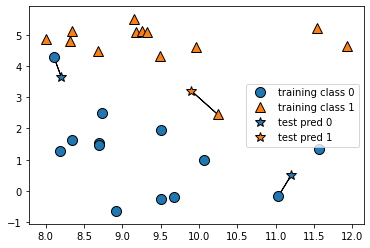

In [2]:
# For number of neighbors equal to 1
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


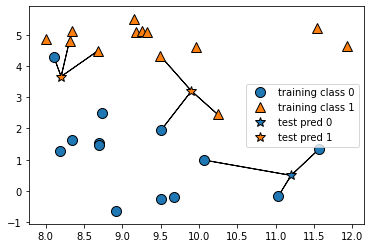

In [3]:
# For number of neighbors equal to 3

mglearn.plots.plot_knn_classification(n_neighbors=3)

## Applying KNN on make_forge() dataset

In [4]:
from mglearn.datasets import make_forge
from sklearn.model_selection import train_test_split

In [5]:
x, y = make_forge()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [6]:
# Importing the KNN from sklearn library and setting parameters

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [7]:
# Fitting the model on the dataset

clf.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [8]:
# Making the test set predictions

print("\nTest set predictions {}".format(clf.predict(x_test)))


Test set predictions [1 0 1 0 1 0 0]


In [9]:
# Checking the test set accuracy

print("\nTest set accuracy {:.2f}".format(clf.score(x_test, y_test)))


Test set accuracy 0.86


In [10]:
import matplotlib.pyplot as plt

### Analysing the KNN with different values of k

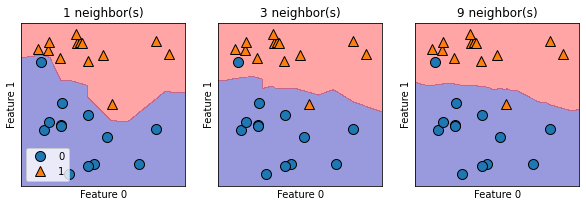

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, 
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax = ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

Graphs to demonstrate the smoothness of the boundaries between the two sets 
of points and the boundary keeps getting smooth as the number of neighbors 
increase. A smoother graph means a simple model. 


### Plotting accuracy of training and testing data

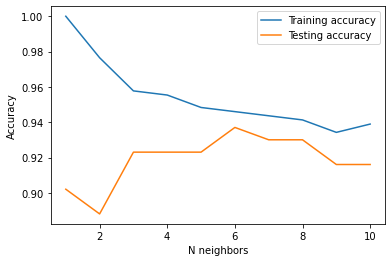

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target,
                                                   random_state=66)
train_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    train_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))

plt.plot(neighbors_settings, train_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Testing accuracy")
plt.ylabel("Accuracy")
plt.xlabel("N neighbors")
plt.legend()

## K - Neighbors regression
This is the regression variant of KNN. 

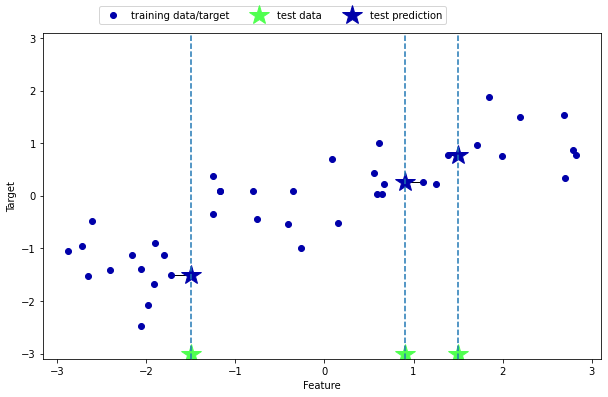

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

The above graph uses the single closest neighbor for regression. When using mulitple, we take the mean of those points.

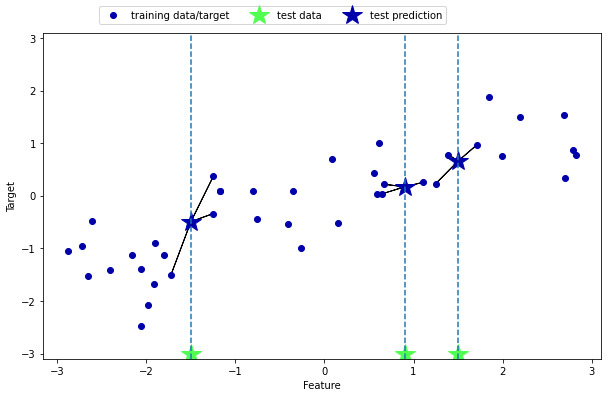

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [15]:
# Importing and applying k-Neighbors regressor on make_wave() dataset

from sklearn.neighbors import KNeighborsRegressor

x, y = mglearn.datasets.make_wave(n_samples=40)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [16]:
print("\nTest set predictions {}".format(reg.predict(x_test)))


Test set predictions [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [17]:
print("\nThe score for the regressor is {:.2f}".format(reg.score(x_test, y_test)))


The score for the regressor is 0.83


A relatively good model fit with 86% accuracy.

### Analysing k-Neighbors regressor through plots

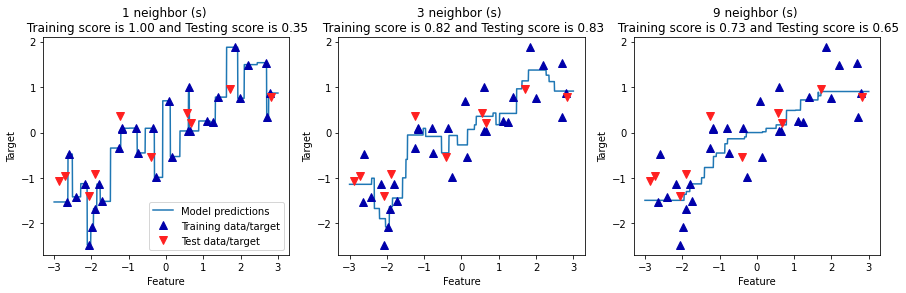

In [23]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace (-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip ([1, 3, 9], axes):
    reg = KNeighborsRegressor (n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor (s) \n Training score is {:.2f} and Testing score is {:.2f}".
                 format(n_neighbors, reg.score(x_train, y_train), 
                       reg.score(x_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target",
                   "Test data/target"], loc="best")

The first plot considers only 1 neighbor which leads to a very zig-zag curve as it tries to fit each point perfectly. This may lead to overfitting. As we increase the number of neighbors, the curve gets smoother and smoother but it fits the training data less well. 

#### Advantage of KNN 
Easy to use and implement and since there is only 1 parameter, a lot of tuning can take place 

#### Disadvantage of KNN
Cannot handle multiple features and does not work well with datasets having a lot of features.